## 교차 검증1, 2

In [1]:
import os, warnings
import numpy as np
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [2]:
import mglearn

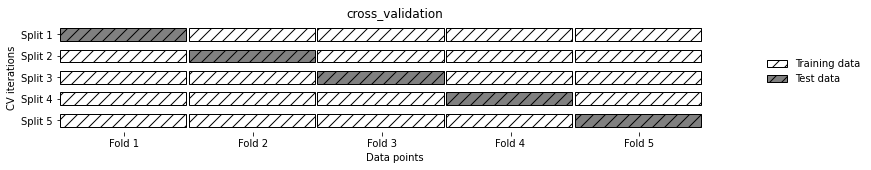

In [3]:
mglearn.plots.plot_cross_validation()

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
iris = load_iris()
logreg = LogisticRegression()

In [6]:
scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수 : {}".format(scores))

교차 검증 점수 : [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [7]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("교차 검증 점수 : {}".format(scores))

교차 검증 점수 : [0.98 0.96 0.98]


In [8]:
print("교차 검증 점수 : {:.2f}".format(scores.mean()))

교차 검증 점수 : 0.97


In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
print("iris 레이블 :\n{}".format(iris.target))

iris 레이블 :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


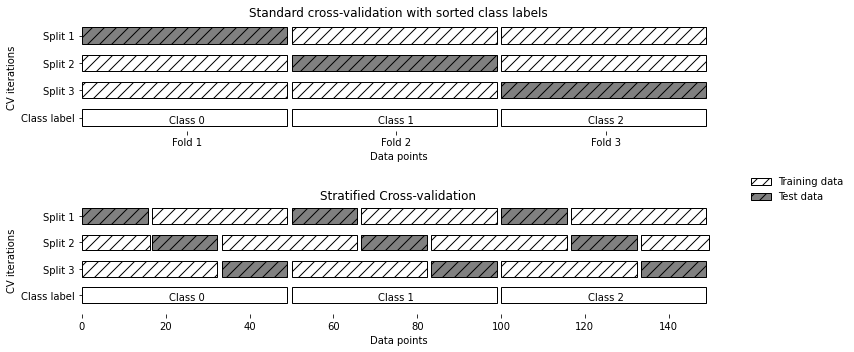

In [10]:
mglearn.plots.plot_stratified_cross_validation()

In [12]:
import numpy as np
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

In [14]:
kfold = KFold(n_splits=3)
print("교차 검증 점수 : \n{}".format(cross_val_score(logreg, 
                                               iris.data, 
                                               iris.target, cv=kfold)))

교차 검증 점수 : 
[0. 0. 0.]


In [15]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수 : \n{}".format(cross_val_score(logreg, 
                                               iris.data, 
                                               iris.target, cv=kfold)))

교차 검증 점수 : 
[0.98 0.96 0.96]


In [16]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("교차 검증 점수 : \n{}".format(cross_val_score(logreg, 
                                               iris.data, 
                                               iris.target, cv=kfold)))

교차 검증 점수 : 
[1.         1.         0.86666667 0.93333333 0.83333333]


In [17]:
import os, warnings
import numpy as np
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import sklearn
import pandas as pd
import mglearn

print(sklearn.__version__)

0.23.2


In [19]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
print(df.shape)

(506, 14)


In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
X = df.drop(['price'], axis=1)
y = df['price']

In [22]:
lr_model = LinearRegression()
neg_mse_scores = cross_val_score(lr_model, X, y, 
                                 scoring='neg_mean_squared_error', cv=5 )

rmse = np.sqrt(-1 * neg_mse_scores)

print(rmse)
print("평균 RMSE : {0:.3f}".format( np.mean(rmse) ) )

[3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
평균 RMSE : 5.829


In [23]:
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier

loo = LeaveOneOut()
iris = load_iris()
tree = DecisionTreeClassifier()
scores = cross_val_score(tree, iris.data, iris.target, cv=loo)

print("교차 검증 분할 횟수 : ", len(scores))
print("평균 정확도 : {:.2f}".format(scores.mean()))

교차 검증 분할 횟수 :  150
평균 정확도 : 0.95


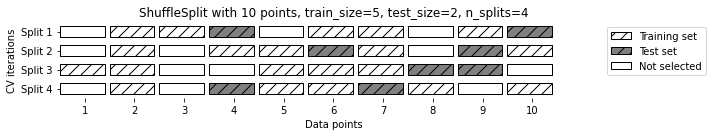

In [24]:
mglearn.plots.plot_shuffle_split()

In [25]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(train_size=10, test_size=5,  n_splits=10)

scores = cross_val_score(tree, iris.data, iris.target, 
                         cv=shuffle_split)

print("교차 검증 점수 : \n{}".format(scores))
avg = scores.mean()
print("평균 : {:.2f}".format( avg )  )

교차 검증 점수 : 
[0.8 0.8 1.  0.8 0.6 1.  1.  0.8 1.  0.8]
평균 : 0.86


In [26]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)

scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수 : \n{}".format(scores))
scores.mean()

교차 검증 점수 : 
[0.96       0.97333333 0.97333333 0.98666667 0.98666667 0.98666667
 0.96       0.96       0.94666667 0.93333333]


0.9666666666666668

In [27]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

In [28]:
iris = load_iris()
logreg = LogisticRegression()

In [29]:
# n_split : 5    분할 폴드 수(기본값 : 5)
# n_repeat = 10  반복횟수(기본값 : 10)
# 반복할때마다 데이터를 다시 섞습니다.
rskfold = RepeatedStratifiedKFold(random_state=42, n_splits=5, n_repeats=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

print("횟수 : ", len(scores))
print("교차 검증 점수 : \n",  scores)
print("교차 검증 평균 점수 : {:.3f}".format(scores.mean() ) )

횟수 :  50
교차 검증 점수 : 
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수 : 0.965


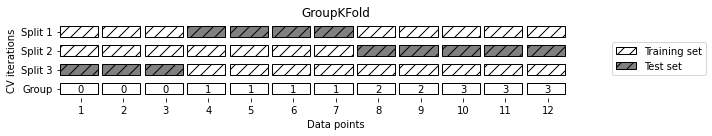

In [30]:
mglearn.plots.plot_group_kfold()

In [31]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=12, random_state=0)
print(X.shape, y.shape)

# 처음 세 개의 샘플은 같은 그룹에 속하고,
# 다음은 네 개의 샘플이 같습니다.
groups = [0,0,0, 1,1,1,1, 2,2, 3,3,3] # 4개 그룹

scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수 : \n", scores)

(12, 2) (12,)
교차 검증 점수 : 
 [0.75       0.6        0.66666667]


In [32]:
gkf = GroupKFold(n_splits=3)
groups = [0,0,0, 1,1,1,1, 2,2, 3,3,3]
X, y = make_blobs(n_samples=12, random_state=0)

for train, test in gkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[ 0  1  2  7  8  9 10 11] [3 4 5 6]
[0 1 2 3 4 5 6] [ 7  8  9 10 11]
[ 3  4  5  6  7  8  9 10 11] [0 1 2]


In [33]:
gkf = GroupKFold(n_splits=4)
groups = [0,0,0, 1,1,1,1, 2,2, 3,3,3]
X, y = make_blobs(n_samples=12, random_state=0)

for train, test in gkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[ 0  1  2  7  8  9 10 11] [3 4 5 6]
[0 1 2 3 4 5 6 7 8] [ 9 10 11]
[ 3  4  5  6  7  8  9 10 11] [0 1 2]
[ 0  1  2  3  4  5  6  9 10 11] [7 8]


In [34]:
from sklearn.model_selection import GroupKFold

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

gkf = GroupKFold(n_splits=3)
for train, test in gkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[0 1 2 3 4 5] [6 7 8 9]
[0 1 2 6 7 8 9] [3 4 5]
[3 4 5 6 7 8 9] [0 1 2]


## Grid Search 1, 2

In [35]:
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

In [36]:
from sklearn.svm import SVC

In [37]:
iris = load_iris()

In [38]:
# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    random_state=0)

print("훈련 세트 : {}, 테스트 세트 : {}".format(X_train.shape[0], 
                                                X_test.shape[0]))

훈련 세트 : 112, 테스트 세트 : 38


In [39]:
# 최적의 score 변수
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        # 테스트 세트로 SVC를 평가
        score = svm.score(X_test, y_test)
        
        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

            print(best_score)
            print(best_parameters)
            
print("최고 점수 : {:.2f}".format(best_score))
print("최적 매개변수 :", best_parameters)

0.23684210526315788
{'C': 0.001, 'gamma': 0.001}
0.5789473684210527
{'C': 1, 'gamma': 0.001}
0.9210526315789473
{'C': 10, 'gamma': 0.001}
0.9736842105263158
{'C': 100, 'gamma': 0.001}
최고 점수 : 0.97
최적 매개변수 : {'C': 100, 'gamma': 0.001}


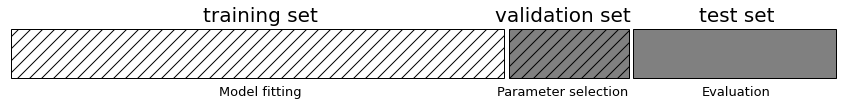

In [40]:
mglearn.plots.plot_threefold_split()

In [41]:
from sklearn.svm import SVC

# 학습(훈련+검증), 테스트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    random_state=0)

In [42]:
# 훈련+검증(X_trainvalid, y_trainvalid)을 활용하여 
# 훈련, 검증로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, 
                                                      y_trainval,
                                                      random_state=0)

In [43]:
print("훈련 세트: {}, 검증 세트: {}, 테스트 세트: {}".format(X_train.shape[0], 
                                               X_valid.shape[0], 
                                               X_test.shape[0]  ))

훈련 세트: 84, 검증 세트: 28, 테스트 세트: 38


In [44]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        # 검증 세트로 SVC를 평가
        score = svm.score(X_valid, y_valid)
        
        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후,
# 테스트 세트를 사용해 평가합니다.
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("검증 세트에서 최고 점수 : {:.2f}".format(best_score))
print("최적 매개변수 : ", best_parameters)
print("최적 매개변수에서 테스트 세트 점수 : {:.2f}".format(test_score))

검증 세트에서 최고 점수 : 1.00
최적 매개변수 :  {'C': 100, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수 : 0.97


In [45]:
import numpy as np

In [46]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련
        svm = SVC(gamma=gamma, C=C)
        
        # 교차 검증을 적용합니다. 
        scores =  cross_val_score(svm, X_trainval, y_trainval, cv=5)
        
        # 교차 검증 정확도의 평균을 계산.
        score = np.mean(scores)

        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

In [47]:
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후,
# 테스트 세트를 사용해 평가합니다.
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
# test_score = svm.score(X_test, y_test)

SVC(C=100, gamma=0.001)

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (36).

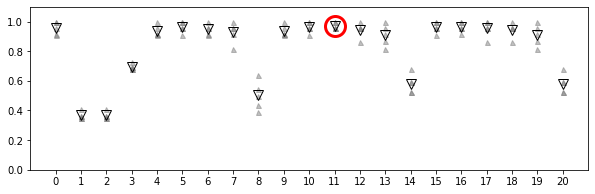

In [50]:
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)
mglearn.plots.plot_cross_val_selection()

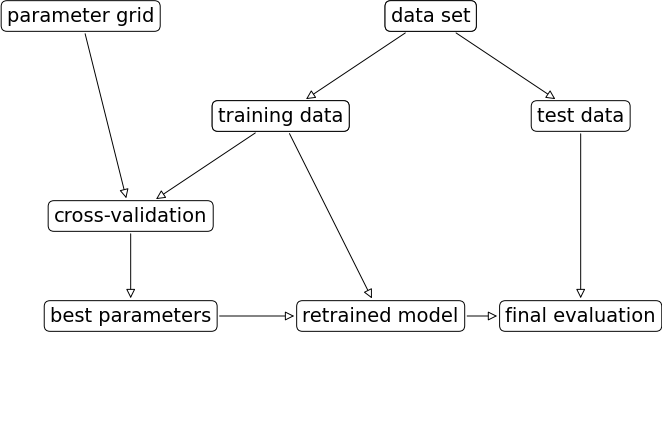

In [51]:
mglearn.plots.plot_grid_search_overview()

In [52]:
# 매개변수 
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100] }
print("매개변수 그리드 :\n", param_grid)

매개변수 그리드 :
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [54]:
# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    random_state=0)

In [55]:
# 찾기 학습
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [56]:
# 훈련 후, 테스트로 적용 후, 점수
grid_search.score(X_test, y_test)

0.9736842105263158

In [57]:
print("최적 매개변수 :", grid_search.best_params_)
print("최고 교차 검증 점수 : {:.2f}".format(grid_search.best_score_))

### 교차 검증 중, 최고 성능 모델 확인
print("최고 성능 모델 :\n", grid_search.best_estimator_)

최적 매개변수 : {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수 : 0.97
최고 성능 모델 :
 SVC(C=10, gamma=0.1)


In [58]:
import pandas as pd
pd.set_option('display.max_columns', None)

# DataFrame으로 변환
results = pd.DataFrame(grid_search.cv_results_)
results.shape

(36, 22)

In [59]:
# 처음 다섯 개 행을 출력
display(np.transpose(results.head() ))

,0,1,2,3,4
mean_fit_time,0.00139642,0.00139718,0.00100288,0.000998306,0.00159512
std_fit_time,0.00079751,0.00048889,8.56796e-06,1.23794e-06,0.000490551
mean_score_time,0.000599003,0.000399399,0.000991201,0.000996208,0.000998163
std_score_time,0.000489084,0.000489162,9.62762e-06,2.08722e-06,0.000630539
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


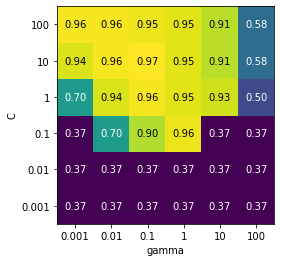

In [60]:
scores = np.array(results.mean_test_score).reshape(6,6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, 
                      xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'],
                      cmap='viridis'            
                      )

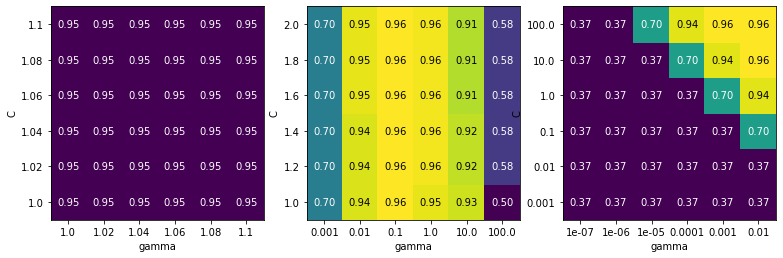

In [61]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize=(13,5))

param_grid_linear = {'C':np.linspace(1.0, 1.1, 6),
                     'gamma': np.linspace(1.0, 1.1, 6) }

param_grid_one_log = {'C':np.linspace(1,2,6), 
                     'gamma': np.logspace(-3,2,6) }

param_grid_range = {'C': np.logspace(-3,2,6),
                    'gamma': np.logspace(-7,-2,6) }

for param_grid, ax in zip([param_grid_linear,
                            param_grid_one_log,
                            param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    

    # 교차 검증 평균 점수 히트맵 그래프
    scores_image = mglearn.tools.heatmap(scores, 
                      xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'],
                      cmap='viridis', ax=ax                                       
                      )

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd

In [63]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

In [65]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

print("그리드 목록:\n{}".format(param_grid))

그리드 목록:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [66]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [67]:
results = pd.DataFrame(grid_search.cv_results_)
# 좀 더 나은 출력을 위해 결과를 전치시킵니다
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00159693,0.000997591,0.000997877,0.00139699,0.00160279,0.00198789,0.00139461,0.00219431,0.00138965,0.00139079,0.00139308,0.00180206,0.00139608,0.000997877,0.000997925,0.000986958,0.000990248,0.00158825,0.00120425,0.00139046,0.00178967,0.000997353,0.00119429,0.00138884,0.00100355,0.000797796,0.000797367,0.000990438,0.00158858,0.00158887,0.000993872,0.000804424,0.000798321,0.00119414,0.00119672,0.00160217,0.00100384,0.000997353,0.000798178,0.000797653,0.00119576,0.000997162
std_fit_time,0.000797095,1.15233e-06,2.39655e-06,0.000488736,0.000493564,0.0009013,0.000799132,0.000736231,0.000785161,0.000480463,0.000492289,0.0004028,0.000489084,2.43421e-06,1.35375e-06,2.05237e-05,1.35203e-05,0.00048352,0.000413418,0.000481052,0.000396288,6.1065e-07,0.000398746,0.000480446,1.23954e-05,0.000398898,0.000398686,0.000619285,0.000484204,0.000484439,6.75125e-06,0.000402396,0.000399161,0.000393558,0.000398469,0.000492661,0.000630289,2.097e-06,0.00039909,0.000398827,0.000745119,4.67203e-07
mean_score_time,0.000597382,0.000997114,0.00100217,0.000397682,0.000798559,0.000796986,0.000798035,0.000798178,0.000797749,0.000398445,0.000398254,0.000199461,0.000398922,0.000200987,0.000598669,0.000398827,0,0.000406027,0.000399637,0.00039854,0.000198984,0.000598383,0.000598335,0.000807381,0.000393152,0.000399065,0.000199413,0.000597715,0.000199223,0.000797462,0.000199747,0.000598049,0.000605583,0.000598574,0.000606871,0.000398397,0.000798607,0,0.000601768,0.000200129,0.000598669,0.00040555
std_score_time,0.000487763,8.71452e-07,8.89733e-06,0.000487059,0.000399285,0.000398496,0.000399019,0.00039909,0.000977038,0.000487994,0.00048776,0.000398922,0.000488578,0.000401974,0.000488812,0.000488461,0,0.000497403,0.000489454,0.000488111,0.000397968,0.000488578,0.000488539,0.000403945,0.000481609,0.000488753,0.000398827,0.000488033,0.000398445,0.000398732,0.000399494,0.000488305,0.000494649,0.000488733,0.000495622,0.000487935,0.000399304,0,0.000491379,0.000400257,0.000488811,0.000496796
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C':

In [68]:
from sklearn.model_selection import cross_val_score

param_grid = {  'C'    : [0.001, 0.01, 0.1, 1, 10, 100],
                'gamma': [0.001, 0.01, 0.1, 1, 10, 100]  }

scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)

print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())
print(param_grid)

교차 검증 점수:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수:  0.9800000000000001
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
